In [24]:
!ls -l /mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/train1000/

total 141217
-rw-rw-r-- 1 hkhachatrian hkhachatrian  3807520 May  9  2022 few_shot_200.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian  1036717 May 10  2022 few_shot_50.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian   106980 Apr 11  2022 few_shot_5.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian   129460 Apr 21  2022 few_shot_8.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian   105116 May 26  2022 find_grain5.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian   132344 May 26  2022 find_grain8.json
drwxrwxr-x 2 hkhachatrian hkhachatrian    22907 Oct  4  2022 images
drwxrwxr-x 2 hkhachatrian hkhachatrian    22907 Oct  4  2022 labelTxt
-rw-rw-r-- 1 hkhachatrian hkhachatrian 69449640 May 26  2022 train1000_5classes.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian 69837240 Mar 31  2022 train1000.json


In [25]:
!ls -l /mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/val1000/

total 111454
-rw-rw-r-- 1 hkhachatrian hkhachatrian  4206398 Apr 22  2022 few_shot_200.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian    12572 May 10  2022 few_shot_2.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian 10156061 May 29  2022 few_shot_500.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian   965281 May 10  2022 few_shot_50.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian    74530 Apr 11  2022 few_shot_5.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian   142254 Apr 15  2022 few_shot_8.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian  4123333 May 28  2022 filtered_200.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian  9948769 May 29  2022 filtered_500.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian  4233022 May 26  2022 fine_grained200.json
-rw-rw-r-- 1 hkhachatrian hkhachatrian 10217014 May 29  2022 fine_grained500.json
drwxrwxr-x 2 hkhachatrian hkhachatrian    12707 Oct  4  2022 images
drwxrwxr-x 2 hkhachatrian hkhachatrian    12706 Oct  4  2022 labelTxt
-rw-rw-r-- 1 hkhachatrian hkhachatrian 34924754 May 26  2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
import json 

with open('/mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/train1000/few_shot_8.json') as f:
    data = json.load(f)

In [4]:
import json 

with open('/mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/val1000/fine_grained500.json') as f:
    dataset = json.load(f)

In [5]:
dataset.keys()

dict_keys(['images', 'categories', 'annotations'])

In [6]:
dataset['annotations'][0]

{'category_id': 13,
 'segmentation': [[72, 70, 637, 84, 638, 34, 73, 20]],
 'iscrowd': 0,
 'bbox': [72, 20, 566, 64],
 'area': 36224,
 'image_id': 1,
 'id': 1}

In [7]:
dataset.keys()

dict_keys(['images', 'categories', 'annotations'])

In [8]:
from shapely.geometry import Polygon

def quadrangle_intersection_area(q1, q2):
    # Create Polygon objects for the two quadrangles
    poly1 = Polygon([(q1[i], q1[i+1]) for i in range(0, len(q1), 2)])
    poly2 = Polygon([(q2[i], q2[i+1]) for i in range(0, len(q2), 2)])

    # Find the intersection of the two polygons
    intersection = poly1.intersection(poly2)

    # Calculate the area of the intersection
    return intersection.area


# Example usage
q1 = [0, 0, 4, 0, 4, 4, 0, 4]
q2 = [2, 2, 6, 2, 6, 6, 2, 6]

intersection_area = quadrangle_intersection_area(q1, q2)
print("Intersection area:", intersection_area)


Intersection area: 4.0


In [9]:
anno34 = [a for a in dataset['annotations'] if a['category_id']==10]

In [10]:
tiled_dataset['images'][765]['file_name']

NameError: name 'tiled_dataset' is not defined

In [579]:
[im for im in dataset['images'] if im['file_name'].split('.')[0] == tiled_dataset['images'][765]['file_name'].split('.')[0]][0]

{'file_name': '8102__1__0___0.png', 'id': 179, 'width': 1000, 'height': 1000}

In [608]:
img = np.zeros((1000,1000), dtype='int8')
cv2.fillPoly(img, np.array(tile_box).reshape(1, 4,2), color=2)
cv2.fillPoly(img, np.array(anno_polygon).reshape(1, 4,2), color=1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

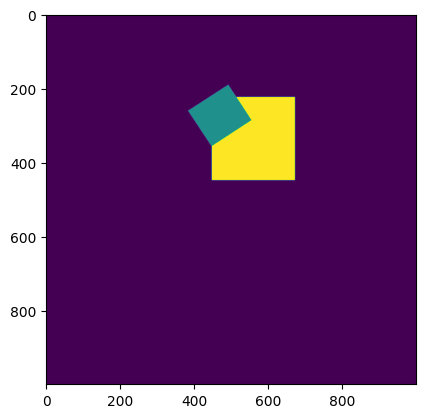

In [609]:
plt.figure()
plt.imshow(img)

In [660]:
x_count, y_count = 4, 4

In [661]:
target_size=224

category_to_tile = {i:[] for i in range(39)}

for anno in tqdm(dataset['annotations']):
# anno = anno34[0]
    anno_polygon = anno['segmentation'][0]
    full_area = quadrangle_intersection_area([0,0,1000,0,1000,1000,0,1000], anno_polygon)

    for x in range(x_count):
        for y in range(y_count):
            tile_box = [x*target_size, y*target_size, (x+1)*target_size, y*target_size, 
                        (x+1)*target_size, (y+1)*target_size, x*target_size, (y+1)*target_size]

            area = quadrangle_intersection_area(tile_box, anno_polygon)

            coverage = area / full_area
            if coverage > 1/3:
#                 print(anno['image_id'], x, y, coverage)
                category_to_tile[anno['category_id']].append((anno['image_id'], x, y))
        

100%|████████████████████████████████████████████████████████████████████████████| 60627/60627 [01:17<00:00, 785.08it/s]


In [667]:
image = [im for im in dataset['images'] if im['id'] == 4762][0]

img = cv2.imread(path+image['file_name'])

labels = cv2.imread(gt_path+image['file_name'])


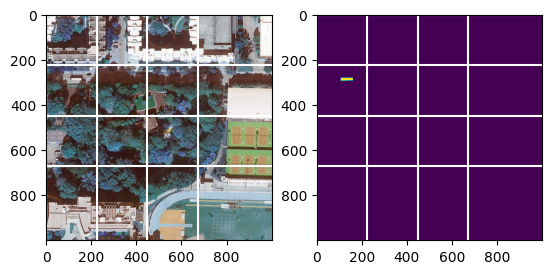

In [668]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow((labels == 23)[:,:,0])
for x in range(x_count):
    ax[1].plot([x*target_size, x*target_size], [0,999], color='white')
    ax[1].plot([0, 999], [x*target_size, x*target_size], color='white')
    ax[0].plot([x*target_size, x*target_size], [0,999], color='white')
    ax[0].plot([0, 999], [x*target_size, x*target_size], color='white')

In [699]:
available_tiles = {(im['id'], 
  int(im['file_name'].split('.')[1].split('_')[2]),
  int(im['file_name'].split('.')[1].split('_')[1])) for im in tiled_dataset['images']}

In [700]:
selected_tiles = {i: [] for i in range(39)}
selected_flatten = set([])

In [701]:
for cat in range(39):
    remaining = (set(category_to_tile[cat]) - selected_flatten)
    remaining = remaining.intersection(available_tiles)
    remaining = list(remaining)
    select = remaining[:8]
    selected_tiles[cat] = select
    selected_flatten.update(set(select))
    print(f"For Category #{cat}, {len(remaining)} out of {len(set(category_to_tile[cat]))} tiles were available. Selected {len(select)} of them.")

For Category #0, 0 out of 0 tiles were available. Selected 0 of them.
For Category #1, 358 out of 358 tiles were available. Selected 8 of them.
For Category #2, 54 out of 54 tiles were available. Selected 8 of them.
For Category #3, 149 out of 150 tiles were available. Selected 8 of them.
For Category #4, 132 out of 132 tiles were available. Selected 8 of them.
For Category #5, 0 out of 0 tiles were available. Selected 0 of them.
For Category #6, 396 out of 399 tiles were available. Selected 8 of them.
For Category #7, 114 out of 115 tiles were available. Selected 8 of them.
For Category #8, 81 out of 85 tiles were available. Selected 8 of them.
For Category #9, 218 out of 225 tiles were available. Selected 8 of them.
For Category #10, 7 out of 7 tiles were available. Selected 7 of them.
For Category #11, 35 out of 35 tiles were available. Selected 8 of them.
For Category #12, 610 out of 625 tiles were available. Selected 8 of them.
For Category #13, 145 out of 145 tiles were available

In [732]:
tiled_dataset_8shot = {'images':[]}
for cat in range(39):
    for (image_id, x, y) in selected_tiles[cat]:
        image = [im for im in dataset['images'] if im['id'] == image_id][0]
        filename = image['file_name'].split('.')[0]
        tile_name = f"{filename}.224_{y}_{x}.png"

        selected_tiles_ds = [im for im in tiled_dataset['images'] if im['file_name'] == tile_name]
        assert len(selected_tiles_ds) == 1, (cat, image_id, x, y, tile_name)
        tiled_dataset_8shot['images'].append(selected_tiles_ds[0])
        

In [739]:
tiled_dataset_8shot['categories'] = dataset['categories']

In [742]:
tiled_dataset_8shot['images'][0].keys()

dict_keys(['file_name', 'file_name_1', 'file_name_2', 'file_name_3', 'file_name_4', 'height', 'width', 'id', 'black_image', 'patch_labels', 'patch_labels_1', 'patch_labels_2', 'patch_labels_3', 'patch_labels_4', 'patch_labels_16x16', 'patch_labels_16x16_1', 'patch_labels_16x16_2', 'patch_labels_16x16_3', 'patch_labels_16x16_4'])

In [755]:
path = '../images/f1m/224_8shot/train/'
for anno in tqdm(tiled_dataset_8shot['images']):
    img = tiled_images[anno['file_name']]
    cv2.imwrite(path+anno['file_name'], img)

100%|█████████████████████████████████████████████████████████████████████████████████| 295/295 [04:30<00:00,  1.09it/s]


In [775]:
for i in range(tiled_dataset_8shot['images']):
    tiled_dataset_8shot['images']

SyntaxError: expected ':' (2890242097.py, line 1)

In [1]:
tiled_dataset_8shot['images'][0]

NameError: name 'tiled_dataset_8shot' is not defined

In [774]:
path = '../images/f1m/224_8shot_shift4/train/'
for anno in tqdm(tiled_dataset_8shot['images']):
    img = tiled_images_4[anno['file_name']]
    cv2.imwrite(path+anno['file_name'], img)

100%|█████████████████████████████████████████████████████████████████████████████████| 295/295 [03:49<00:00,  1.29it/s]


In [770]:
!mkdir ../images/f1m/224_8shot_shift2/train

In [761]:
tiled_images_1['4283__1__0___0.224_0_0.png'][0]

array([[ 86, 109, 111],
       [ 86, 109, 111],
       [ 87, 110, 112],
       [ 87, 110, 112],
       [ 86, 109, 111],
       [ 86, 109, 111],
       [ 85, 108, 110],
       [ 84, 109, 111],
       [ 84, 109, 111],
       [ 84, 109, 111],
       [ 84, 109, 111],
       [ 84, 109, 111],
       [ 84, 109, 111],
       [ 84, 109, 111],
       [ 84, 109, 111],
       [ 84, 109, 111],
       [ 84, 109, 111],
       [ 83, 108, 110],
       [ 83, 108, 110],
       [ 83, 108, 110],
       [ 82, 107, 109],
       [ 82, 107, 109],
       [ 82, 107, 109],
       [ 81, 106, 108],
       [ 81, 106, 108],
       [ 82, 107, 109],
       [ 83, 108, 110],
       [ 82, 107, 109],
       [ 81, 106, 108],
       [ 79, 104, 106],
       [ 78, 103, 105],
       [ 78, 103, 105],
       [ 78, 103, 105],
       [ 78, 103, 105],
       [ 78, 103, 105],
       [ 78, 103, 105],
       [ 78, 103, 105],
       [ 78, 103, 105],
       [ 78, 103, 105],
       [ 78, 103, 105],
       [ 78, 103, 105],
       [ 79, 104

In [745]:
np.save('../annotations/f1m/224_8shot_shifts.npy', tiled_dataset_8shot)

In [753]:
img.shape

(224, 224, 3)

In [750]:
!mkdir ../images/f1m/224_8shot/train

In [749]:
!ls -lah ../images/f1m/250_8shot

total 0
drwxrwxr-x 4 hkhachatrian hkhachatrian 2 Mar 22 12:09 .
drwxrwxr-x 9 hkhachatrian hkhachatrian 7 May 10 13:04 ..
drwxrwxr-x 3 hkhachatrian hkhachatrian 2 Mar 22 13:03 train
drwxrwxr-x 3 hkhachatrian hkhachatrian 9 Apr 12 09:12 val


In [734]:
[ann['id'] for ann in tiled_dataset_8shot['images']]

[1898,
 1762,
 3052,
 3126,
 2047,
 2114,
 598,
 2116,
 968,
 671,
 1525,
 780,
 363,
 1236,
 1686,
 490,
 16,
 780,
 1662,
 1225,
 702,
 2224,
 62,
 1826,
 469,
 760,
 1743,
 1648,
 2224,
 1284,
 1944,
 964,
 1334,
 1086,
 2214,
 807,
 1132,
 278,
 1299,
 382,
 3364,
 861,
 273,
 1949,
 2611,
 2532,
 273,
 1553,
 237,
 580,
 1106,
 707,
 671,
 1752,
 1541,
 563,
 127,
 382,
 539,
 466,
 2193,
 67,
 275,
 278,
 670,
 2116,
 2007,
 1665,
 1120,
 893,
 2007,
 505,
 2221,
 1157,
 273,
 1624,
 1380,
 758,
 1918,
 2046,
 600,
 286,
 1139,
 1556,
 186,
 383,
 1096,
 684,
 85,
 1406,
 4927,
 1709,
 3768,
 1637,
 882,
 705,
 4789,
 1967,
 618,
 3402,
 617,
 3123,
 2145,
 895,
 1843,
 1551,
 628,
 1220,
 4927,
 88,
 660,
 1025,
 1041,
 1480,
 1100,
 1555,
 4927,
 2641,
 2107,
 829,
 661,
 1344,
 411,
 979,
 1507,
 829,
 912,
 81,
 585,
 1324,
 2138,
 3138,
 1423,
 1375,
 1680,
 646,
 811,
 1629,
 1767,
 785,
 1790,
 1510,
 1703,
 1323,
 2898,
 1749,
 433,
 195,
 2056,
 68,
 6241,
 595,
 1395,
 

In [729]:
len(selected_flatten), len(tiled_dataset_8shot['images'])

(295, 295)

In [730]:
tiled_dataset_8shot['images'][0]

(1898, 1, 2)

In [716]:
[ann['file_name'] for ann in dataset['images'] if ann['id'] == 2231]

['5262__1__0___0.png']

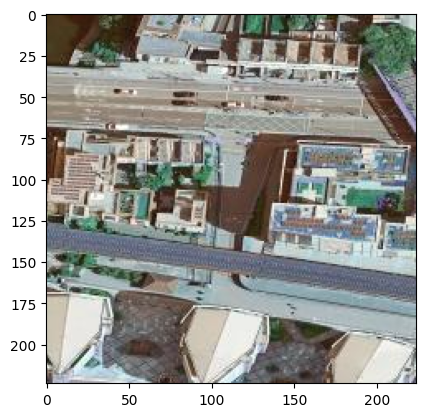

In [718]:
plt.imshow(tiled_images['5262__1__0___0.224_0_3.png']);

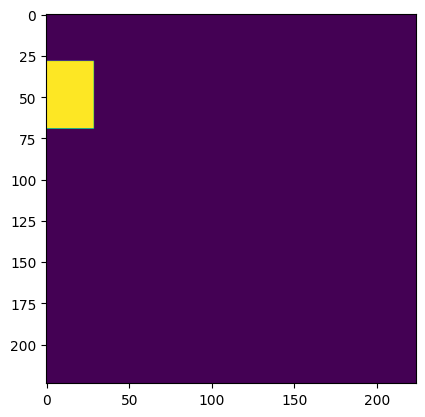

In [720]:
plt.imshow([anno['black_image'] for anno in tiled_dataset['images'] if anno['file_name'] == '5262__1__0___0.224_0_3.png'][0])

In [205]:
import json 

with open('/mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/train1000/find_grain8.json') as f:
    data = json.load(f)

In [86]:
tip = 'val'
dataset = np.load(f'../annotations/f1m_labeled_200_{tip}.npy', allow_pickle=True).item()

In [206]:
%%time
dataset = np.load(f'../annotations/f1m_fine_grain8.npy', allow_pickle=True).item()

CPU times: user 116 ms, sys: 581 ms, total: 697 ms
Wall time: 2.79 s


In [216]:
tip = 'val'

In [6]:
from tqdm import tqdm
import cv2
import os

In [217]:
target_size=224
tiled_dataset = {
    'images': [],
    'categories': dataset['categories']
}
tiled_images = {}
tiled_images_1 = {}
tiled_images_2 = {}
tiled_images_3 = {}
tiled_images_4 = {}

gt_path = '/home/hkhachatrian/mae/images/f1m/fine_grain_500/gt/'
offset = 4
path = f'/mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/{tip}1000/images/'
for image in tqdm(dataset['images']):
    height, width = image['height'], image['width']
    file_name_split = image['file_name'].split('/')[-1].split('.')
    # print(file_name_split)
    name = '.'.join(file_name_split[:-1])
    extension = file_name_split[-1]
    
    y_count = int(np.ceil(height / target_size))
    x_count = int(np.ceil(width / target_size))
#     print(y_count, x_count)
    # print(image['file_name'])
    # print(path+image['file_name'])
    img = cv2.imread(path+image['file_name'])
    img_pad = np.zeros((y_count * target_size, x_count * target_size, img.shape[2]), np.uint8)
    img_pad[:height, :width] = img
    
    mask_pad = np.zeros((y_count * target_size, x_count * target_size), np.uint8)
    
    black_image = cv2.imread(gt_path+image['file_name'])[:, :, 0]
    mask_pad[:height, :width] = black_image
#     mask_pad[:height, :width] = image['black_image']
    
    for y in range(y_count-1):
        for x in range(x_count-1):
            tile = img_pad[y*target_size : (y+1)*target_size, x*target_size: (x+1)*target_size]
            tile_1 = img_pad[y*target_size+1 : (y+1)*target_size+1, x*target_size+1: (x+1)*target_size+1]
            tile_2 = img_pad[y*target_size+2 : (y+1)*target_size+2, x*target_size+2: (x+1)*target_size+2]
            tile_3 = img_pad[y*target_size+3 : (y+1)*target_size+3, x*target_size+3: (x+1)*target_size+3]
            tile_4 = img_pad[y*target_size+4 : (y+1)*target_size+4, x*target_size+4: (x+1)*target_size+4]
            
            
            
            # cv2.imwrite(tile_name, tile)
            
            tile_black_image = mask_pad[y*target_size: (y+1)*target_size, x*target_size: (x+1)*target_size]
            tile_black_image_1 = mask_pad[y*target_size+1: (y+1)*target_size+1, x*target_size+1: (x+1)*target_size+1]
            tile_black_image_2 = mask_pad[y*target_size+2: (y+1)*target_size+2, x*target_size+2: (x+1)*target_size+2]
            tile_black_image_3 = mask_pad[y*target_size+3: (y+1)*target_size+3, x*target_size+3: (x+1)*target_size+3]
            tile_black_image_4 = mask_pad[y*target_size+4: (y+1)*target_size+4, x*target_size+4: (x+1)*target_size+4]
            
            tile_patch_labels = cv2.resize(tile_black_image, (14,14), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()
            if tile_patch_labels.sum() != 0:
                
                # tile_name = os.path.join(target_path, f"{name}.{target_size}_{y}_{x}.{extension}")
                tiled_images[f"{name}.{target_size}_{y}_{x}.{extension}"] = tile
                tiled_images_1[f"{name}.{target_size}_{y}_{x}.{extension}"] = tile_1
                tiled_images_2[f"{name}.{target_size}_{y}_{x}.{extension}"] = tile_2
                tiled_images_3[f"{name}.{target_size}_{y}_{x}.{extension}"] = tile_3
                tiled_images_4[f"{name}.{target_size}_{y}_{x}.{extension}"] = tile_4
            
                tile_patch_labels_1 = cv2.resize(tile_black_image_1, (14,14), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()
                tile_patch_labels_2 = cv2.resize(tile_black_image_2, (14,14), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()
                tile_patch_labels_3 = cv2.resize(tile_black_image_3, (14,14), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()
                tile_patch_labels_4 = cv2.resize(tile_black_image_4, (14,14), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()

                tile_patch_labels_16x16 = cv2.resize(tile_black_image, (16,16), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()
                tile_patch_labels_16x16_1 = cv2.resize(tile_black_image_1, (16,16), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()
                tile_patch_labels_16x16_2 = cv2.resize(tile_black_image_2, (16,16), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()
                tile_patch_labels_16x16_3 = cv2.resize(tile_black_image_3, (16,16), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()
                tile_patch_labels_16x16_4 = cv2.resize(tile_black_image_4, (16,16), interpolation=cv2.INTER_NEAREST_EXACT).flatten() #.float()

                tiled_dataset['images'].append({
                    'file_name': f"{name}.{target_size}_{y}_{x}.{extension}",
                    'file_name_1': f"{name}.{target_size}_{y}_{x}.offset_1.{extension}",
                    'file_name_2': f"{name}.{target_size}_{y}_{x}.offset_2.{extension}",
                    'file_name_3': f"{name}.{target_size}_{y}_{x}.offset_3.{extension}",
                    'file_name_4': f"{name}.{target_size}_{y}_{x}.offset_4.{extension}",

                    'height': target_size,
                    'width': target_size,
                    'id': image['id'], # if we need annotations, this has to be fixed
                    'black_image': tile_black_image,
                    'patch_labels': tile_patch_labels,
                    'patch_labels_1': tile_patch_labels_1,
                    'patch_labels_2': tile_patch_labels_2,
                    'patch_labels_3': tile_patch_labels_3,
                    'patch_labels_4': tile_patch_labels_4,

                    'patch_labels_16x16': tile_patch_labels_16x16,
                    'patch_labels_16x16_1': tile_patch_labels_16x16_1,
                    'patch_labels_16x16_2': tile_patch_labels_16x16_2,
                    'patch_labels_16x16_3': tile_patch_labels_16x16_3,
                    'patch_labels_16x16_4': tile_patch_labels_16x16_4,
                })

100%|███████████████████████████████████████████████████████████████████████████████| 2500/2500 [07:48<00:00,  5.34it/s]


In [218]:
dataset['categories']

[{'id': 1, 'name': 'boeing737', 'supercategory': 'boeing737'},
 {'id': 2, 'name': 'boeing777', 'supercategory': 'boeing777'},
 {'id': 3, 'name': 'boeing747', 'supercategory': 'boeing747'},
 {'id': 4, 'name': 'boeing787', 'supercategory': 'boeing787'},
 {'id': 5, 'name': 'a320', 'supercategory': 'a320'},
 {'id': 6, 'name': 'a220', 'supercategory': 'a220'},
 {'id': 7, 'name': 'a330', 'supercategory': 'a330'},
 {'id': 8, 'name': 'a350', 'supercategory': 'a350'},
 {'id': 9, 'name': 'a321', 'supercategory': 'a321'},
 {'id': 10, 'name': 'c919', 'supercategory': 'c919'},
 {'id': 11, 'name': 'arj21', 'supercategory': 'arj21'},
 {'id': 12, 'name': 'other-airplane', 'supercategory': 'other-airplane'},
 {'id': 13, 'name': 'passenger ship', 'supercategory': 'passenger ship'},
 {'id': 14, 'name': 'motorboat', 'supercategory': 'motorboat'},
 {'id': 15, 'name': 'fishing boat', 'supercategory': 'fishing boat'},
 {'id': 16, 'name': 'tugboat', 'supercategory': 'tugboat'},
 {'id': 17, 'name': 'engineerin

In [296]:
counts = np.zeros((len(tiled_dataset['images']), len(dataset['categories'])+1))
names = []
for i, img_info in enumerate(tiled_dataset['images']):
    labels = np.zeros(6)
    uniques, _counts = np.unique(img_info['patch_labels'], return_counts=True)
#     print(uniques, _counts)
    for j in range(uniques.shape[0]):
#         print(uniques[j], _counts[j])
        counts[i][uniques[j]] = _counts[j]
    names.append(img_info['file_name'])
#     break
    

1


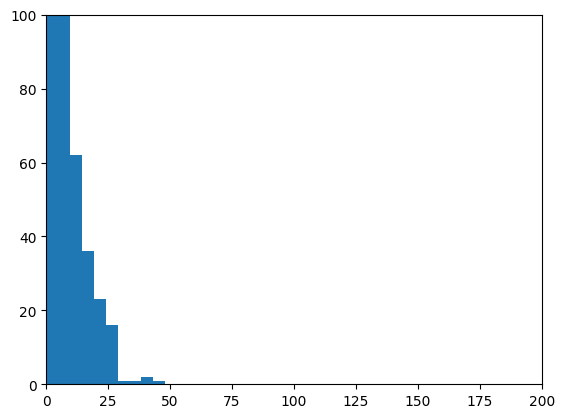

In [266]:
i = 1
print(i)
plt.ylim((0, 100))
plt.xlim((0, 200))
plt.hist(counts[:, i:i+1]);

In [268]:
counts[:, :].max(axis=0)

array([195.,  48.,  54., 104.,  74.,   0.,  43., 105.,  88.,  34.,  17.,
        25., 117.,  79.,  80.,  63.,  15., 136.,  68., 111.,  53.,  34.,
        36.,  24.,  67.,  18.,  56.,  11.,   3.,  34.,  13.,  16., 145.,
        61., 196., 102., 156., 143., 128.])

In [222]:
tmp = counts[:, 1:].max(axis=0)
np.where(tmp==17)

(array([9]),)

In [203]:
counts[:, 1:].max(axis=0).argmin()

4

In [93]:
np.where(tmp <= 10)[0]

array([ 1093,  2410,  3744,  4434,  4783,  6554, 10906, 12435, 12685,
       12954, 13048, 13074, 13119, 13493])

In [126]:
np.where(tmp == 112)[0]

array([ 8275, 11682, 12601, 12887, 13055, 13429])

In [ ]:
[12536,  2049,   597, 13378, 10521, 12357, 13489, 11947]
[7192, 6644, 3450, 9367, 5390, 9359,  910, 3600]

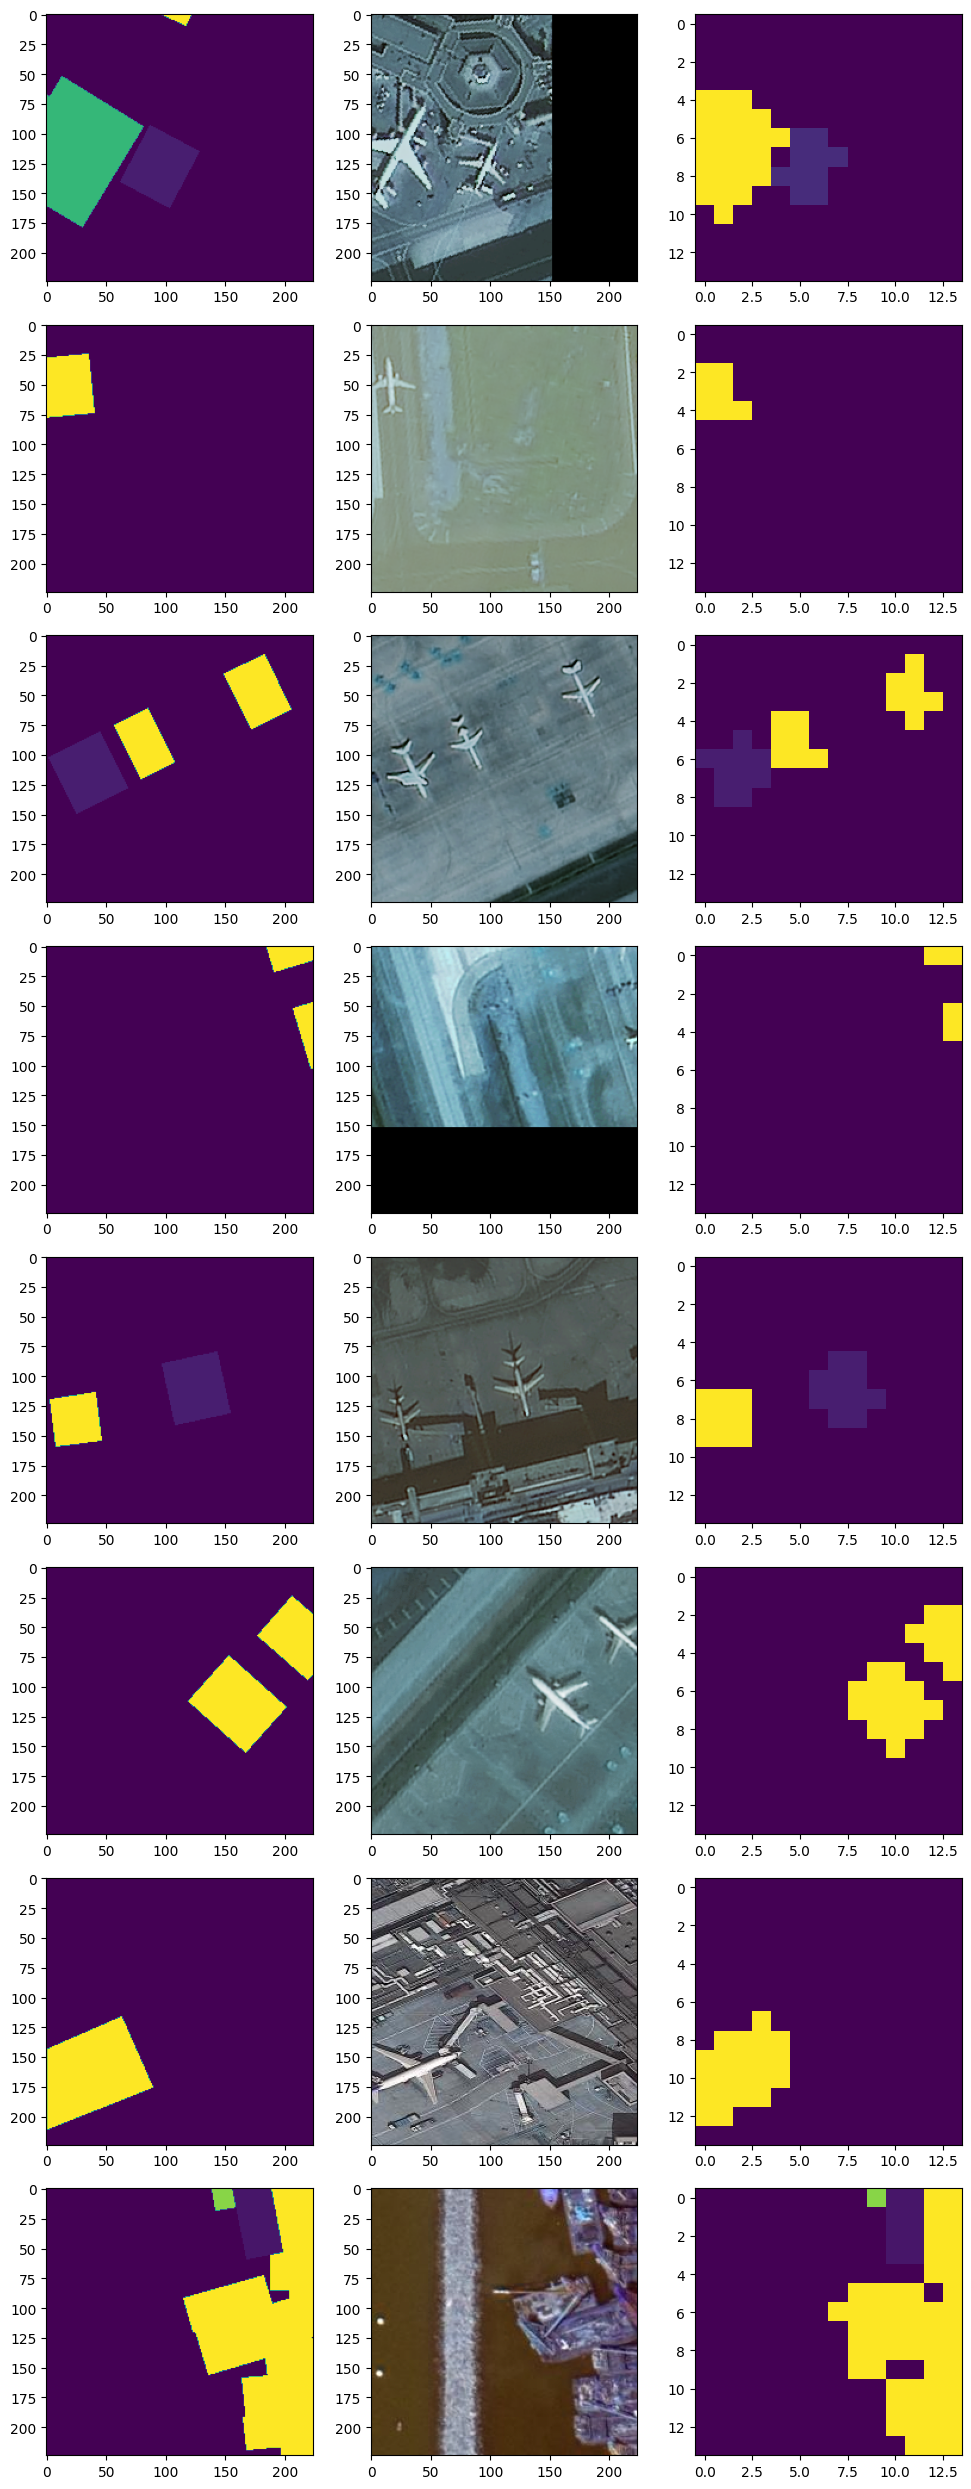

In [368]:
indices = [7192, 6644, 3450, 9367, 5390, 9359,  910, 3600]
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(10, 25))
for i, ind in enumerate(indices):
    axes[i][0].imshow(tiled_dataset['images'][ind]['black_image'])
    
    f_n = tiled_dataset['images'][ind]['file_name']
    axes[i][1].imshow(tiled_images[f_n])
    
    axes[i][2].imshow(tiled_dataset['images'][ind]['patch_labels'].reshape(14, 14))
plt.tight_layout()
plt.show();

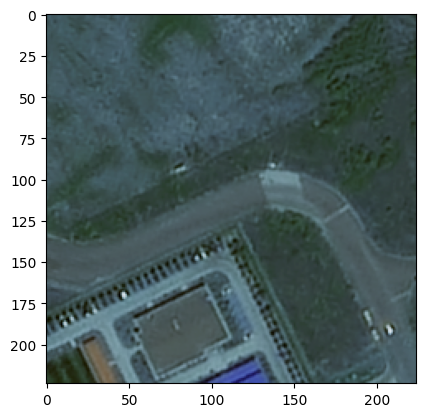

In [362]:
f_n = tiled_dataset['images'][11947]['file_name']


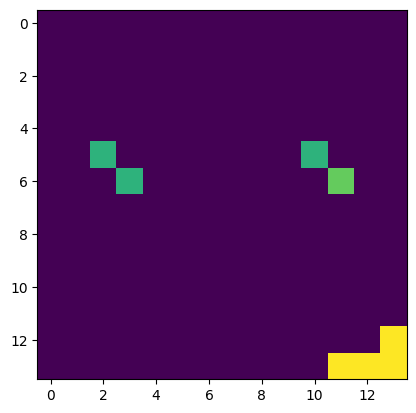

In [350]:
plt.imshow(tiled_dataset['images'][12536]['patch_labels'].reshape(14, 14));

In [278]:
counts[:, i:i+1].sum()

3994.0

In [115]:
# np.random.shuffle(counts)
# np.random.shuffle(counts)
# np.random.shuffle(counts)
# np.random.shuffle(names)
# np.random.shuffle(names)
# np.random.shuffle(names)

In [279]:
len(names)

13656

In [280]:
len(dataset['images'])

2500

In [316]:
mask = {i: np.all((125>counts[:,i], counts[:,i]>1), axis=0) 
                    for i in range(0,len(dataset['categories'])+1)}

In [317]:
len(mask)

39

In [318]:
counts.shape

(13656, 39)

In [323]:
np.all((125>counts[:,34], counts[:,34]>1), axis=0).sum()

606

In [324]:
counts[1000]

array([195.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.])

In [325]:
np.argwhere(mask[1])

array([[   47],
       [   49],
       [  153],
       [  154],
       [  159],
       [  521],
       [  586],
       [  683],
       [  705],
       [  768],
       [  769],
       [  770],
       [  772],
       [  831],
       [  832],
       [  833],
       [  885],
       [  887],
       [  888],
       [  889],
       [  910],
       [ 1032],
       [ 1034],
       [ 1036],
       [ 1037],
       [ 1119],
       [ 1120],
       [ 1121],
       [ 1134],
       [ 1135],
       [ 1136],
       [ 1138],
       [ 1159],
       [ 1182],
       [ 1209],
       [ 1210],
       [ 1277],
       [ 1278],
       [ 1279],
       [ 1312],
       [ 1313],
       [ 1316],
       [ 1317],
       [ 1318],
       [ 1426],
       [ 1429],
       [ 1465],
       [ 1478],
       [ 1479],
       [ 1525],
       [ 1526],
       [ 1529],
       [ 1579],
       [ 1681],
       [ 1684],
       [ 1715],
       [ 1728],
       [ 1729],
       [ 1730],
       [ 1731],
       [ 1733],
       [ 1735],
       [

In [326]:
[mask[i].sum() for i in range(1,len(dataset['categories'])+1)]

[386,
 80,
 216,
 188,
 0,
 438,
 171,
 122,
 248,
 8,
 41,
 687,
 137,
 284,
 113,
 73,
 292,
 164,
 1091,
 112,
 179,
 2630,
 62,
 538,
 540,
 2639,
 57,
 5,
 12,
 62,
 166,
 441,
 155,
 606,
 335,
 114,
 1325,
 272]

In [331]:
mask[0]

array([False, False, False, ..., False, False, False])

In [67]:
[mask[i].sum() for i in range(1,len(dataset['categories'])+1)]

[878, 935, 2706, 602, 704]

In [531]:
K = 8
np.random.seed(0)

# indices = {}

# reserved = set()
# for i in range(1, len(dataset['categories'])+1):
for i in range(class_id, class_id+1):
#     print(i)
    try:
        indices[i] = np.random.choice(list(set(np.argwhere(mask[i]).reshape(-1)) - reserved), size=K, replace=False)
        reserved.update(set(indices[i]))
    except ValueError:
        pass

In [447]:
reserved.add(10275)

In [448]:
class_id

2

In [511]:
t = list(set(np.argwhere(mask[class_id]).reshape(-1)) - reserved)

In [512]:
len(t)

198

In [520]:
k += 1

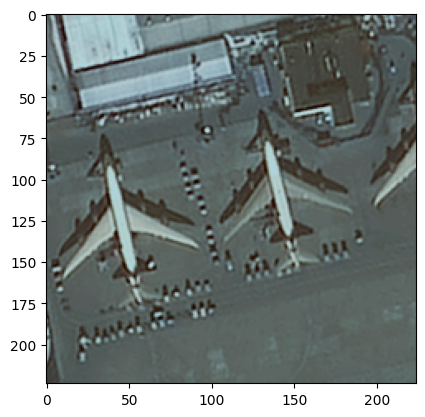

In [521]:
f_n = tiled_dataset['images'][t[k]]['file_name']
plt.imshow(tiled_images[f_n]);

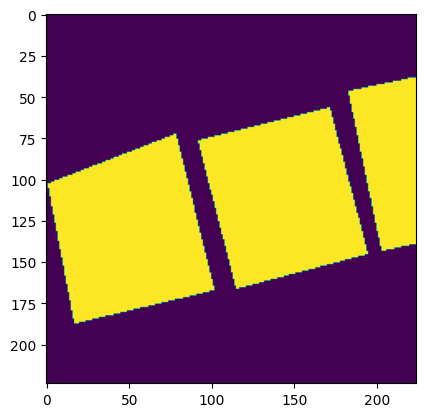

In [522]:
tmp = tiled_dataset['images'][t[k]]['black_image'].copy()
tmp[tmp!=class_id] = 0
plt.imshow(tmp)

In [462]:
np.unique(tiled_dataset['images'][t[3]]['patch_labels'], return_counts=True)

(array([0, 2, 3], dtype=uint8), array([170,  17,   9]))

In [ ]:
indices

In [416]:
for key in indices:
    if 10275 in indices[key]:
        print('yes')

In [527]:
class_id = 4

class_id: 4, 0 (array([0, 4], dtype=uint8), array([180,  16]))
class_id: 4, 1 (array([0, 2, 4], dtype=uint8), array([171,  15,  10]))
class_id: 4, 2 (array([0, 4], dtype=uint8), array([186,  10]))
class_id: 4, 3 (array([0, 4], dtype=uint8), array([172,  24]))
class_id: 4, 4 (array([0, 4, 8], dtype=uint8), array([98, 28, 70]))
class_id: 4, 5 (array([0, 4], dtype=uint8), array([178,  18]))
class_id: 4, 6 (array([0, 4], dtype=uint8), array([176,  20]))
class_id: 4, 7 (array([0, 2, 4], dtype=uint8), array([176,   9,  11]))


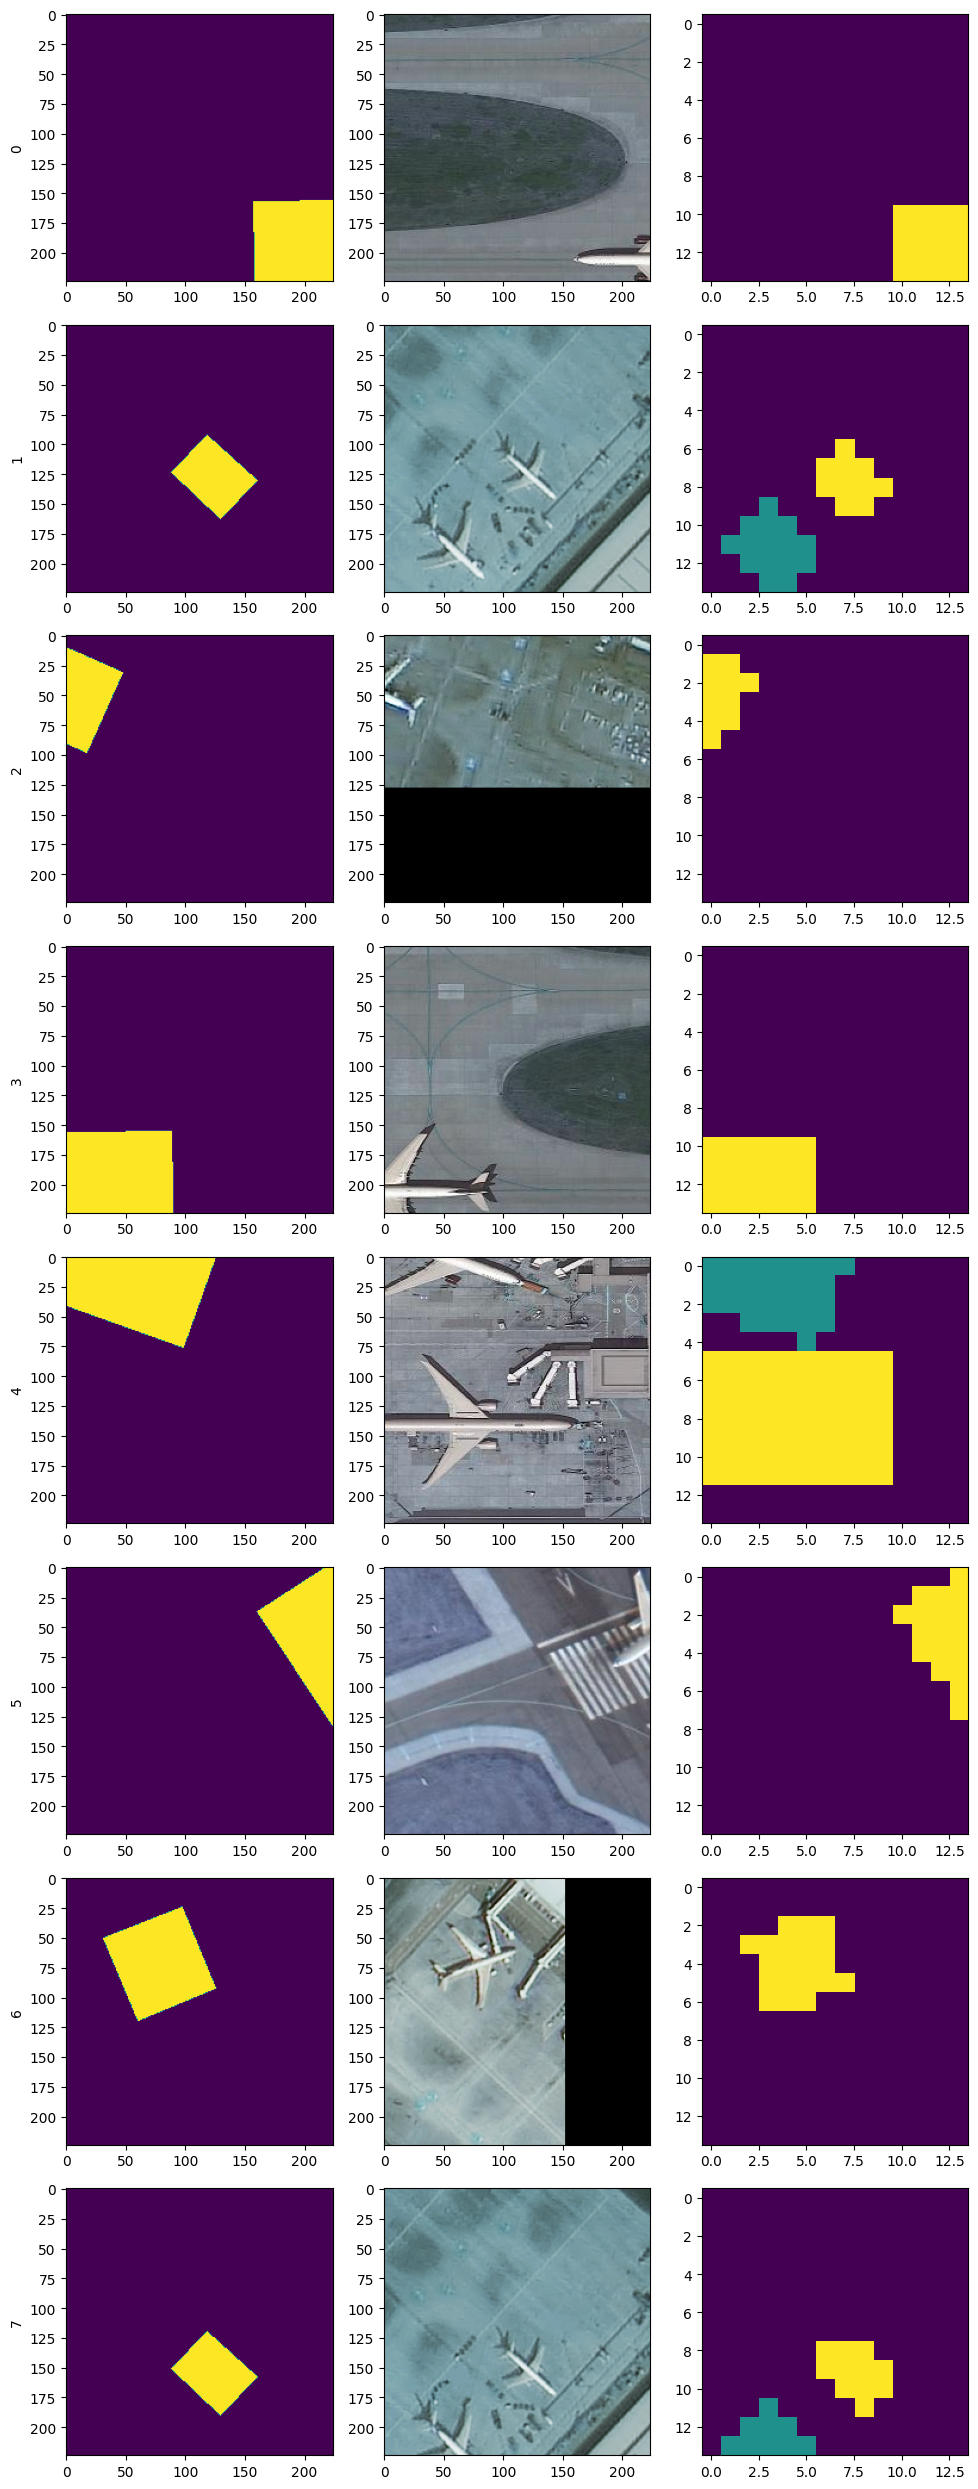

In [532]:
_indices = indices[class_id].copy()
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(10, 25))
for i, ind in enumerate(_indices):
    tmp = tiled_dataset['images'][ind]['black_image'].copy()
    tmp[tmp!=class_id] = 0
    axes[i][0].imshow(tmp)
    axes[i][0].set_ylabel(i)
    f_n = tiled_dataset['images'][ind]['file_name']
    axes[i][1].imshow(tiled_images[f_n])
    
    axes[i][2].imshow(tiled_dataset['images'][ind]['patch_labels'].reshape(14, 14))
    print(f"class_id: {class_id}, {i}", np.unique(tiled_dataset['images'][ind]['patch_labels'], return_counts=True))
plt.tight_layout()
plt.show();

In [530]:
_indices[4:7]

array([5182, 7995, 9287])

In [418]:
(tiled_dataset['images'][10112]['patch_labels'].flatten() == 1).sum()

18

In [438]:
reserved.add(10275)

In [419]:
np.unique(tiled_dataset['images'][10112]['patch_labels'].flatten(), return_counts=True)

(array([0, 1, 9], dtype=uint8), array([172,  18,   6]))

In [523]:
t[k]

10258

In [494]:
_indices[0] = 10112

In [501]:
_indices[0] = 5249
_indices[1] = 3329
_indices[3] = 3081
_indices[5] = 5892
_indices[7] = 9228

In [524]:
_indices[0] = 6717
_indices[3] = 1038
_indices[7] = 10258

In [525]:
reserved.update([5249, 3329, 3081, 5892, 9228, 10258, 1038, 6717])

In [526]:
# new_indices = {}
new_indices[class_id] = _indices

In [503]:
new_indices

{1: array([10112, 10112,  1429,  1135,  7747,  6995,  3939,  7572]),
 2: array([5249, 3329, 4500, 3081, 5757, 5892, 1576, 9228])}

In [370]:
dataset['categories']

[{'id': 1, 'name': 'boeing737', 'supercategory': 'boeing737'},
 {'id': 2, 'name': 'boeing777', 'supercategory': 'boeing777'},
 {'id': 3, 'name': 'boeing747', 'supercategory': 'boeing747'},
 {'id': 4, 'name': 'boeing787', 'supercategory': 'boeing787'},
 {'id': 5, 'name': 'a320', 'supercategory': 'a320'},
 {'id': 6, 'name': 'a220', 'supercategory': 'a220'},
 {'id': 7, 'name': 'a330', 'supercategory': 'a330'},
 {'id': 8, 'name': 'a350', 'supercategory': 'a350'},
 {'id': 9, 'name': 'a321', 'supercategory': 'a321'},
 {'id': 10, 'name': 'c919', 'supercategory': 'c919'},
 {'id': 11, 'name': 'arj21', 'supercategory': 'arj21'},
 {'id': 12, 'name': 'other-airplane', 'supercategory': 'other-airplane'},
 {'id': 13, 'name': 'passenger ship', 'supercategory': 'passenger ship'},
 {'id': 14, 'name': 'motorboat', 'supercategory': 'motorboat'},
 {'id': 15, 'name': 'fishing boat', 'supercategory': 'fishing boat'},
 {'id': 16, 'name': 'tugboat', 'supercategory': 'tugboat'},
 {'id': 17, 'name': 'engineerin

In [90]:
indices.values()

dict_values([[10246, 6153, 4121, 6169, 6170, 6171, 6172, 6174], [4103, 8208, 22, 4138, 4139, 4141, 46, 4142], [0, 8192, 8193, 3, 4, 5, 6, 7], [4102, 14348, 14349, 8209, 8212, 8213, 8214, 4135], [14342, 12296, 12297, 12298, 12299, 12303, 2066, 12306]])

In [93]:
mask.shape

AttributeError: 'dict' object has no attribute 'shape'

In [17]:
img_info = [x for x in tiled_dataset['images'] if x['file_name'] == names[2474]][0]

In [18]:
img_info['patch_labels'].sum()

22

In [100]:
path = f'/mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/250_{K}shot/{tip}/images'

final_json = {
    'images': [],
    'categories': dataset['categories']
}

for val in indices.values():
    for ind in val:
        img_info = [x for x in tiled_dataset['images'] if x['file_name'] == names[ind]][0]
#         print(img_info)
        final_json['images'].append(img_info)
        tile_name = os.path.join(path, names[ind])
        tile = tiled_images[names[ind]]
        cv2.imwrite(tile_name, tile)
#         break
#     break

np.save(f'/mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/250_{K}shot/{tip}/{tip}.npy', final_json)

In [99]:
!mkdir /mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/250_200shot/val/images

In [ ]:
!ls -lah /mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/250_200shot/val/images

In [73]:
!rm /mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/250_8shot/val/images/*

In [86]:
counts[indices[5]]

array([[187.,   0.,   0.,   3.,   0.,   6.],
       [187.,   0.,   0.,   7.,   0.,   2.],
       [186.,   0.,   0.,   5.,   0.,   5.],
       [179.,   0.,   0.,   3.,   0.,  14.],
       [184.,   0.,   0.,   8.,   0.,   4.],
       [187.,   0.,   0.,   5.,   0.,   4.],
       [168.,   0.,   0.,   5.,   0.,  23.],
       [179.,   0.,   0.,   2.,   0.,  15.],
       [182.,   0.,   0.,   5.,   0.,   9.],
       [174.,   0.,   0.,   8.,   0.,  14.],
       [189.,   0.,   0.,   0.,   0.,   7.],
       [125.,   0.,   0.,   5.,   0.,  66.],
       [189.,   0.,   0.,   3.,   0.,   4.],
       [184.,   0.,   0.,   0.,   0.,  12.],
       [173.,   0.,   0.,   1.,   0.,  22.],
       [195.,   0.,   0.,   0.,   0.,   1.],
       [189.,   0.,   0.,   0.,   0.,   7.],
       [187.,   0.,   0.,   0.,   0.,   9.],
       [189.,   0.,   0.,   0.,   0.,   7.],
       [190.,   0.,   0.,   0.,   0.,   6.],
       [181.,   0.,   0.,   0.,   0.,  15.],
       [191.,   0.,   0.,   0.,   0.,   5.],
       [16

In [134]:
!mkdir /mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/250_32shot/val/images

In [83]:
!ls -lah /mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/250_8shot/val

total 0
drwxrwxr-x 3 hkhachatrian hkhachatrian 1 Mar 22 12:09 .
drwxrwxr-x 4 hkhachatrian hkhachatrian 2 Mar 22 12:09 ..
drwxrwxr-x 2 hkhachatrian hkhachatrian 0 Mar 22 12:09 images
total 0
drwxrwxr-x 3 hkhachatrian hkhachatrian 1 Mar 22 12:09 .
drwxrwxr-x 4 hkhachatrian hkhachatrian 2 Mar 22 12:09 ..
drwxrwxr-x 2 hkhachatrian hkhachatrian 0 Mar 22 12:09 images


In [ ]:
f'f1m_train.json'

In [37]:
72*32/19

121.26315789473684

In [ ]:
mask[2]

In [29]:
counts.sum(axis=0)

array([3073128.,   11816.,   11391.,   11271.,   21945.,    6449.])

In [21]:
counts

{'file_name': '8017__1__0___0.250_3_3.png',
 'uniques': array([0], dtype=uint8),
 'counts': array([196])}

In [3]:
import numpy as np

In [4]:
model = 'dino'
labels = np.load(f'/mnt/lwll/lwll-coral/hrant/embeddings/fair1m/f1m_{model}_labels_val.npy')

In [5]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=uint8),
 array([3073128,   11816,   11391,   11271,   21945,    6449]))

In [13]:
tmp = tmp.item()

In [15]:
tmp['images'][0]

[{'file_name': '2348__1__0___0.png',
  'id': 1,
  'width': 1000,
  'height': 1000,
  'black_image': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]])},
 {'file_name': '0__1__0___0.png',
  'id': 2,
  'width': 1000,
  'height': 1000,
  'black_image': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]])},
 {'file_name': '0__1__0___500.png',
  'id': 3,
  'width': 1000,
  'height': 1000,
  'black_image': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., 

In [5]:
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
import json

# with open('/mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/train1000/few_shot_8.json') as f:
#     fair1m = json.load(f)
    
with open('/mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/train1000/train1000_5classes.json') as f:
    fair1m_all = json.load(f)

In [6]:
fair1m_all['images'][0]['file_name']

'2348__1__0___0.png'

In [7]:
dct = {}

path = '/mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/train1000/images'
for i in tqdm(range(len(fair1m_all['images']))):
    img = cv2.imread(os.path.join(path, fair1m_all['images'][i]['file_name']))
    mask_ind = (img == [0, 0, 0])
    counter = mask_ind.sum()
    dct[fair1m_all['images'][i]['file_name']] = counter / img.size
    

100%|█████████████████████████████████████████████████████████████████████████████| 22907/22907 [32:40<00:00, 11.69it/s]


(array([13856.,   254.,    40.,   261.,    26.,  8241.,    96.,    28.,
           19.,    86.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

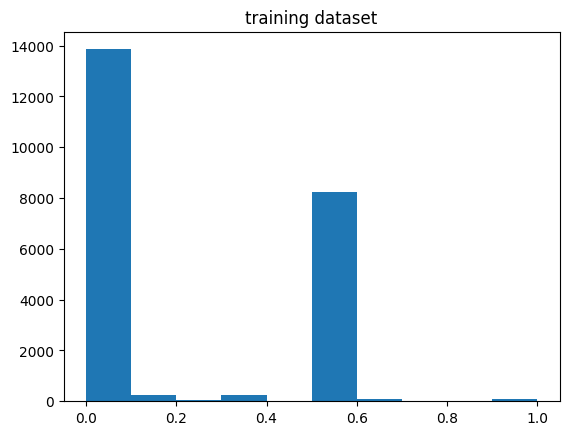

In [9]:

plt.title('training dataset')
plt.hist(dct.values())

In [10]:
with open('/mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/val1000/val1000_5classes.json') as f:
    fair1m_val = json.load(f)

In [11]:
len(fair1m_val['images'])

12706

In [12]:
dct_val = {}

path = '/mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/val1000/images'
for i in tqdm(range(len(fair1m_val['images']))):
    img = cv2.imread(os.path.join(path, fair1m_val['images'][i]['file_name']))
    mask_ind = (img == [0, 0, 0])
    counter = mask_ind.sum()
    dct_val[fair1m_val['images'][i]['file_name']] = counter / img.size
    

100%|█████████████████████████████████████████████████████████████████████████████| 12706/12706 [23:06<00:00,  9.17it/s]


(array([7171.,   48.,   33.,   93.,   29., 4936.,  172.,   24.,   29.,
         171.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

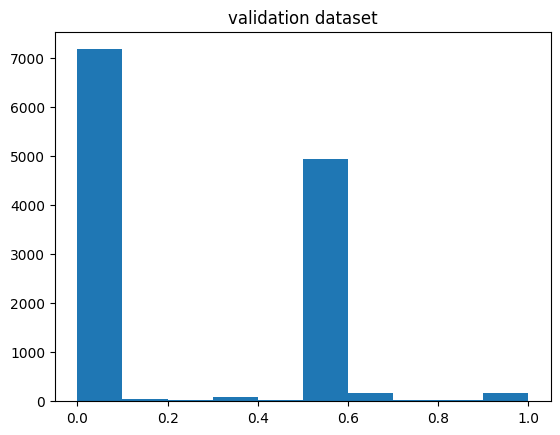

In [13]:
plt.title('validation dataset')
plt.hist(dct_val.values())

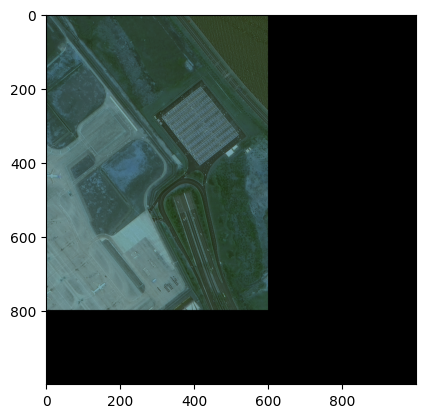

In [24]:
i += 1
path = '/mnt/lwll/lwll-coral/FAIR1M/fair1m_1000/train1000/images'
img = cv2.imread(os.path.join(path, fair1m['images'][i]['file_name']))
plt.imshow(img);

In [27]:
import numpy as np


In [43]:
for i in range(10):
    for j in range(3):
        if list(img[i][j]) == [51, 78, 73]:
            print(img[i][j])
            print('#######')

[51 78 73]
#######


In [49]:
img[img==[0, 0, 0]].shape

(1560000,)

In [65]:
img.size

3000000

In [50]:
(img==[0, 0, 0]).shape

(1000, 1000, 3)

In [52]:
mask_ind = (img == [0, 0, 0])

In [55]:
img[mask_ind] = 255

In [47]:
ind = np.where(img==[0, 0, 0])

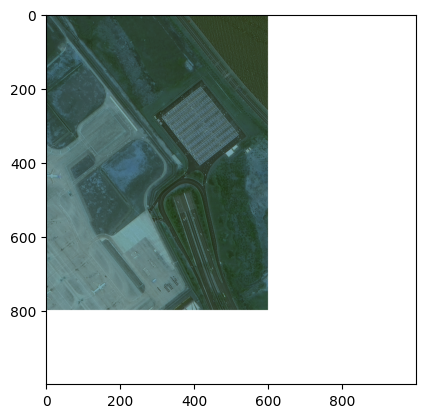

In [56]:
plt.imshow(img)

In [60]:
mask_ind.sum() 

1560000

In [61]:
mask_ind = (img >= 0)

In [62]:
mask_ind.sum()

3000000

In [63]:
1000*1000*3

3000000